# Описание задачи
Датасет содержит информацию об более чем 100'000 бронирований отелей с 2015 по 2017 год. Задача заключается в том, чтобы по имеющимся данным определить вероятность отмены брони.

In [305]:
import os
import numpy
import pandas
import matplotlib.pyplot
import seaborn

In [306]:
DATASET_PATH = os.path.abspath(os.path.join(os.getcwd(), 'hotel_booking.csv'))

In [307]:
dataset = pandas.read_csv(DATASET_PATH)
dataset.columns = dataset.columns.str.strip()

Число объектов и признаков:

In [308]:
dataset.shape

(119390, 36)

# Подготовка датасета

In [309]:
del dataset['reservation_status_date']
del dataset['country']
del dataset['reservation_status']
del dataset['name']
del dataset['email']
del dataset['phone-number']
del dataset['credit_card']

Удалим избыточные данные об желаемом времени заселения, оставив данные только об номере недели.<br>
Замечание: неплохо было бы получить день недели.

In [310]:
del dataset['arrival_date_year']
del dataset['arrival_date_month']
del dataset['arrival_date_day_of_month']

## Обработка пропущенных значений

In [311]:
dataset['meal'].replace({'Undefined': None}, inplace=True)
dataset['market_segment'].replace({'Undefined': None}, inplace=True)
dataset['distribution_channel'].replace({'Undefined': None}, inplace=True)

Посмотрим в каких столбцах имеются пропущенные значения:

In [312]:
dataset.isna().sum()[dataset.isna().sum() != 0]

children                     4
meal                      1169
market_segment               2
distribution_channel         5
agent                    16340
company                 112593
dtype: int64

Пропуски в признаках children, meal, market_segment и distribution_channel заменям на моду

In [313]:
dataset['children'].fillna(dataset['children'].mode()[0], inplace=True)
dataset['meal'].fillna(dataset['meal'].mode()[0], inplace=True)
dataset['market_segment'].fillna(dataset['market_segment'].mode()[0], inplace=True)
dataset['distribution_channel'].fillna(dataset['distribution_channel'].mode()[0], inplace=True)

Признаки agent и company содержат идентификатор агенства и компании соответсвенно. В данном случае пропуски можно связать с тем, что бронирующий не был связан с компанией или агентсвом.

In [314]:
dataset['agent'].fillna(0, inplace=True)
dataset['company'].fillna(0, inplace=True)

In [315]:
dataset['agent'] = numpy.where(dataset['agent'] > 0, 1, 0)
dataset['company'] = numpy.where(dataset['company'] > 0, 1, 0)

# Обработка категориальных признаков

In [316]:
dataset = pandas.get_dummies(dataset)

# Визуализация

Изучим основные метрики

In [317]:
dataset.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.00000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,...,0.002337,0.000008,0.000101,0.876464,0.122179,0.001357,0.03414,0.004833,0.750591,0.210436
std,0.482918,106.863097,13.605138,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,...,0.048285,0.002894,0.010025,0.329053,0.327494,0.036811,0.18159,0.069351,0.432673,0.407620
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Можно заметить подозрительные значения, так max у adults составляет целых 55 человек, посмотрим что это за записи

In [318]:
dataset[dataset['adults'] > 10]

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
1539,1,304,36,0,3,40,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1587,1,333,36,2,5,26,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1643,1,336,37,1,2,50,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1752,1,340,37,2,5,26,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1884,1,347,38,2,5,26,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1917,1,349,39,1,3,27,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1962,1,352,39,1,3,27,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2003,1,354,39,2,5,26,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2164,1,361,40,2,5,26,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2173,1,338,41,2,0,55,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Как видим, как видим все эти бронирования были отменены, причём залог не вносился. Следует оставить эти значения как пример изначально крайне подозрительных.

<AxesSubplot:>

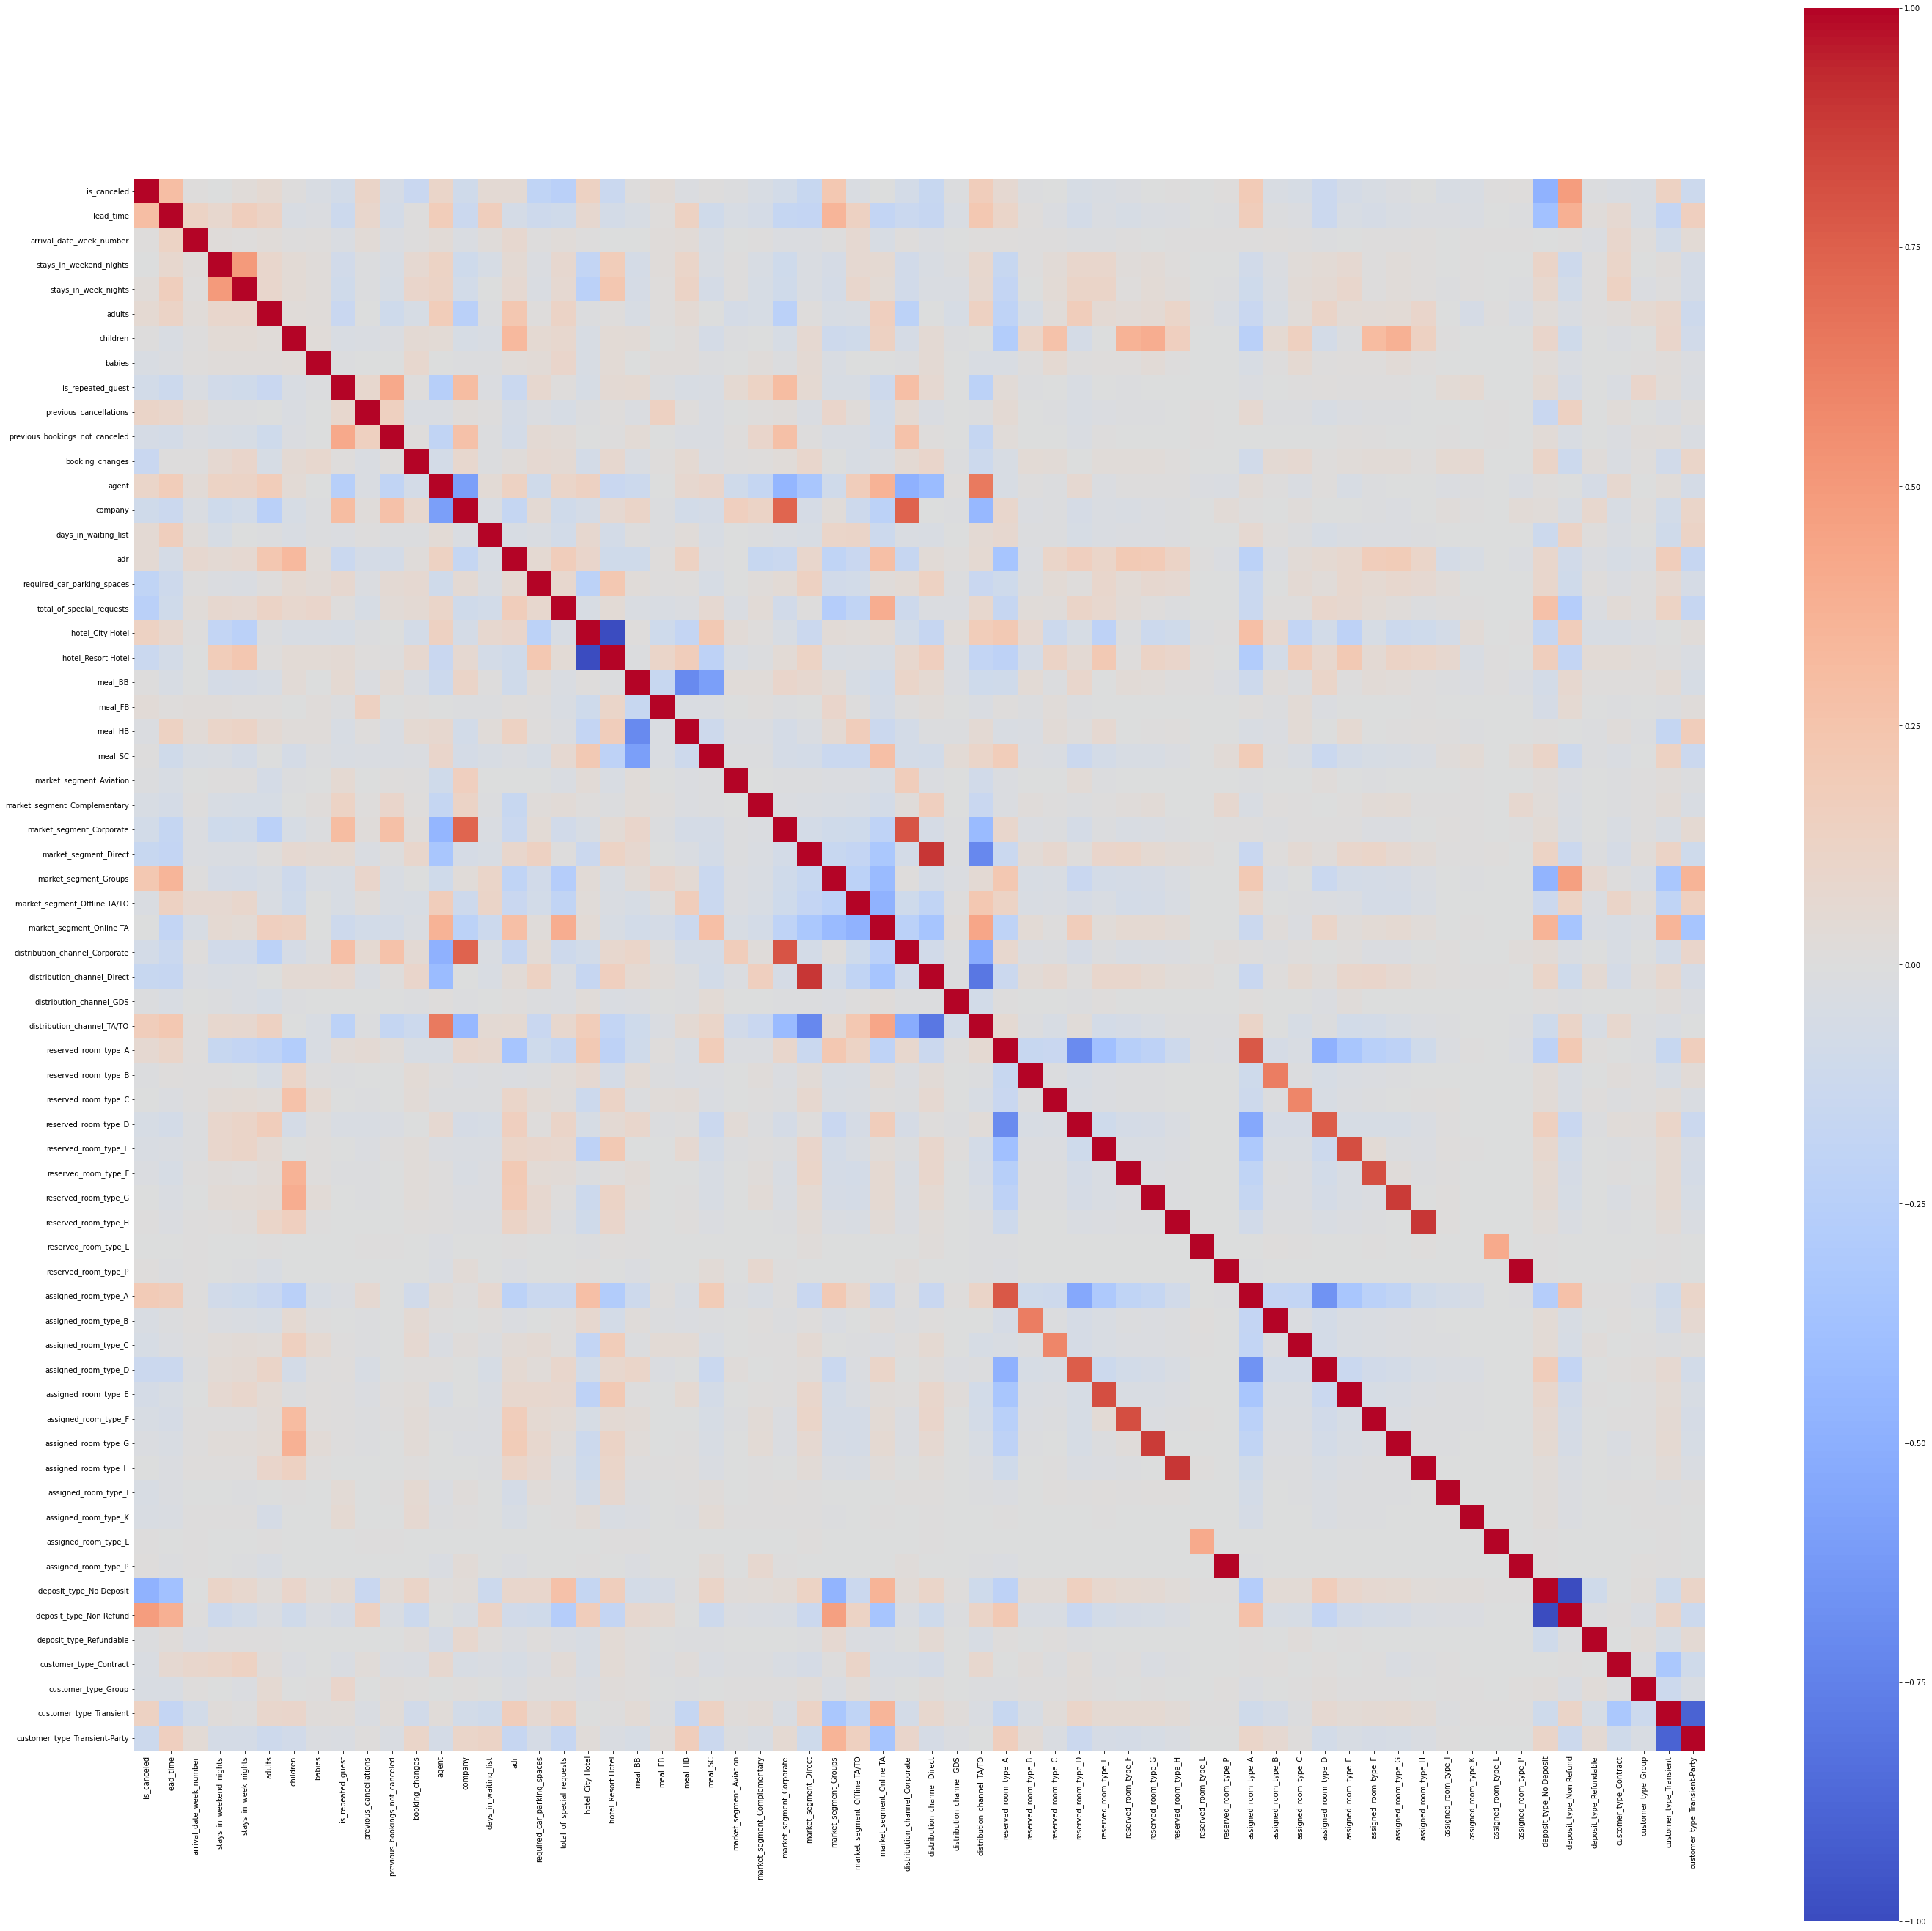

In [319]:
correlation_matrix = dataset.corr()
matplotlib.pyplot.figure(figsize = (48, 48))
seaborn.heatmap(correlation_matrix, square=True, cmap="coolwarm")

Text(0.5, 1.0, 'Зависимость числа ночей от недели прибытия')

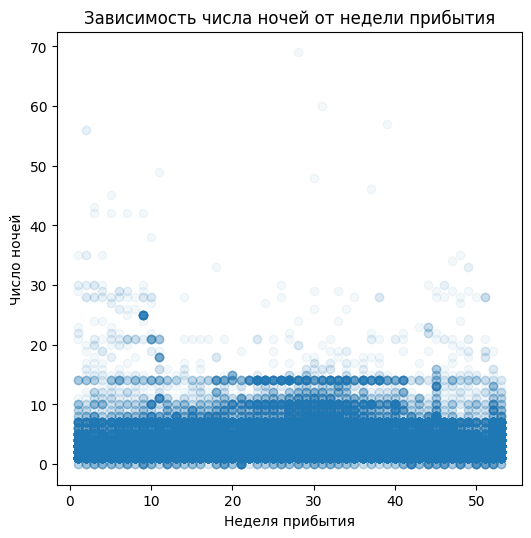

In [320]:
matplotlib.pyplot.figure(figsize = (6, 6), dpi=100)
matplotlib.pyplot.plot(dataset['arrival_date_week_number'], dataset['stays_in_week_nights'] + dataset['stays_in_weekend_nights'], 'o', alpha = 0.05)
matplotlib.pyplot.xlabel('Неделя прибытия')
matplotlib.pyplot.ylabel('Число ночей')
matplotlib.pyplot.title('Зависимость числа ночей от недели прибытия')

# Нормализация признаков

Нормализацию проведём методом стандартизации

In [321]:
dataset_normalized = (dataset - dataset.mean(axis = 0)) / dataset.std(axis = 0)
dataset_normalized.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,...,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,-5.332493e-17,3.618477e-17,-1.847328e-16,-1.225997e-17,4.427873e-17,-5.522939e-17,2.571023e-17,-1.356929e-17,4.570708e-17,3.332808e-18,...,-4.761154e-18,-1.577132e-18,4.642125e-18,-1.275989e-16,-6.856062e-17,1.904462e-18,5.713385e-18,2.285354e-17,-1.971118e-16,-1.133155e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.670373e-01,-9.733146e-01,-1.923183e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,...,-4.839766e-02,-2.894117e-03,-1.002598e-02,-2.663593e+00,-3.730734e-01,-3.686095e-02,-1.880071e-01,-6.968738e-02,-1.734775e+00,-5.162559e-01
25%,-7.670373e-01,-8.048748e-01,-8.206585e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,...,-4.839766e-02,-2.894117e-03,-1.002598e-02,3.754296e-01,-3.730734e-01,-3.686095e-02,-1.880071e-01,-6.968738e-02,5.764387e-01,-5.162559e-01
50%,-7.670373e-01,-3.276287e-01,6.136116e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,...,-4.839766e-02,-2.894117e-03,-1.002598e-02,3.754296e-01,-3.730734e-01,-3.686095e-02,-1.880071e-01,-6.968738e-02,5.764387e-01,-5.162559e-01
75%,1.303707e+00,5.239281e-01,7.963776e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,...,-4.839766e-02,-2.894117e-03,-1.002598e-02,3.754296e-01,-3.730734e-01,-3.686095e-02,-1.880071e-01,-6.968738e-02,5.764387e-01,-5.162559e-01
max,1.303707e+00,5.923360e+00,1.898902e+00,1.809749e+01,2.489129e+01,9.174379e+01,2.482997e+01,1.025497e+02,5.507786e+00,3.069024e+01,...,2.066198e+01,3.455257e+02,9.974008e+01,3.754296e-01,2.680415e+00,2.712875e+01,5.318904e+00,1.434968e+01,5.764387e-01,1.937008e+00


# Классификация

Разделим данные на обучающую и тестовую выборку с соотношением 3:1

In [322]:
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble

In [323]:
x = dataset_normalized.drop(['is_canceled'], axis=1)
y = dataset['is_canceled']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=43)

Для сокращения времени обучения уменьшим размер датасета

In [324]:
x_train = x_train[:len(x_train) // 20]
x_test = x_test[:len(x_test) // 20]
y_train = y_train[:len(y_train) // 20]
y_test = y_test[:len(y_test) // 20]

## К ближайших соседей

4 соседа

In [325]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.14786687513960242, Test: 0.20241286863270777


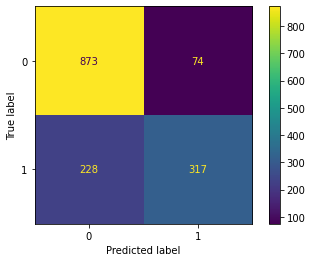

In [326]:
confusion_maxtrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
confusion_maxtrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_maxtrix, display_labels=model.classes_)
confusion_maxtrix_display.plot()
matplotlib.pyplot.show()

6 соседей

In [327]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=6)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.16350234532052713, Test: 0.20777479892761394


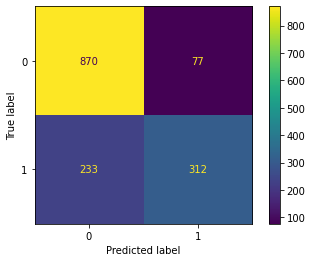

In [328]:
confusion_maxtrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
confusion_maxtrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_maxtrix, display_labels=model.classes_)
confusion_maxtrix_display.plot()
matplotlib.pyplot.show()

## Random forest

In [329]:
model = sklearn.ensemble.RandomForestClassifier()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.0020102747375474648, Test: 0.18431635388739948


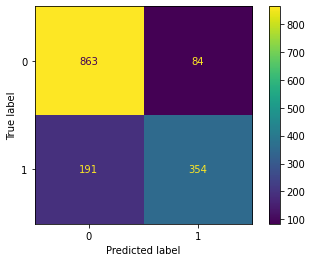

In [330]:
confusion_maxtrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
confusion_maxtrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_maxtrix, display_labels=model.classes_)
confusion_maxtrix_display.plot()
matplotlib.pyplot.show()

## Выводы
* Увеличение числа соседей незначительно снизило точность работы модели.
* Применение random forest позволило ощутимо снизить ошибку
* Обученные алгоритмы хорошо предсказывают негативные случаи, но часто путаются в позитивных

# Обучение нейронной сети

## Обучаем классификатор

In [331]:
import numpy
import os
import pandas
import sklearn
import sklearn.model_selection
import sklearn.metrics
import warnings

from matplotlib import pyplot
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

На данном датасете, возможна плохая сходимость, поэтому выключить сообщения о достижении лимита по итерациям.

In [332]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [333]:
model = MLPClassifier(
    hidden_layer_sizes=(100,),
    solver='lbfgs',
    activation='logistic',
    random_state=42
)

In [334]:
%%time
model.fit(x_train, y_train)

Wall time: 3.19 s


MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

##  Проверяем качество классификатора

In [335]:
y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

In [336]:
print('[Accuracy]\n')
print('Train: {}, Test: {}'.format(
    sklearn.metrics.accuracy_score(y_train, y_train_prediction),
    sklearn.metrics.accuracy_score(y_test, y_test_prediction)
))

[Accuracy]

Train: 0.9883850792941702, Test: 0.7687667560321716


## Подбор гипер параметров

In [337]:
alpha_array = numpy.logspace(-3, 3, 12)
test_error = []
train_error = []

for alpha in alpha_array:
    model = MLPClassifier(
        alpha=alpha,
        hidden_layer_sizes=(100,),
        solver='lbfgs',
        activation ='logistic',
        random_state = 42
    )
    model.fit(x_train, y_train)

    y_train_prediction = model.predict(x_train)
    y_test_prediction = model.predict(x_test)

    test_error.append(numpy.mean(y_test != y_test_prediction))
    train_error.append(numpy.mean(y_train != y_train_prediction))

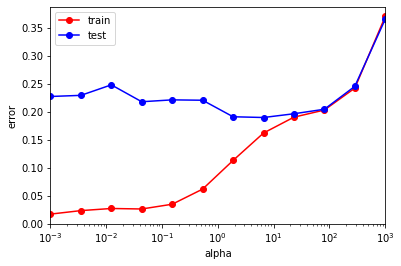

In [338]:
pyplot.semilogx(alpha_array, train_error, 'r-o', label='train')
pyplot.semilogx(alpha_array, test_error, 'b-o', label='test')
pyplot.xlim([numpy.min(alpha_array), numpy.max(alpha_array)])
pyplot.xlabel('alpha')
pyplot.ylabel('error')
pyplot.legend()

При $\alpha$ < $10^-1$ loss не изменяется, при значениях больше начинается рост на обучающей выборке. Когда loss на обучающей достигает по величине loss на тестовой, его ввеличина начинает расти одинаково для обоих выборок.

In [339]:
min_test_error = numpy.min(test_error)
alpha_optimal = alpha_array[test_error == min_test_error][0]
print(f'Optimal alpha: {alpha_optimal}')

Optimal alpha: 6.579332246575675


##  Подбор числа нейронов

Искать оптимальное чило нейронов будем при найденном оптимальном $\alpha$.

In [340]:
neuron_count_array = numpy.linspace(1, 800, 10).astype(int)
test_error = []
train_error = []

for neuron_count in neuron_count_array:
    model = MLPClassifier(
        alpha=alpha_optimal,
        hidden_layer_sizes=(neuron_count,),
        solver='lbfgs',
        activation ='logistic',
        random_state = 42
    )
    model.fit(x_train, y_train)

    y_train_prediction = model.predict(x_train)
    y_test_prediction = model.predict(x_test)

    test_error.append(numpy.mean(y_test != y_test_prediction))
    train_error.append(numpy.mean(y_train != y_train_prediction))

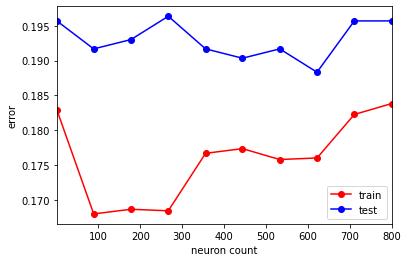

In [341]:
pyplot.plot(neuron_count_array, train_error, 'r-o', label='train')
pyplot.plot(neuron_count_array, test_error, 'b-o', label='test')
pyplot.xlim([numpy.min(neuron_count_array), numpy.max(neuron_count_array)])
pyplot.xlabel('neuron count')
pyplot.ylabel('error')
pyplot.legend()

Минимум ошибки на обучающей выборке достигается при числе нейронов от 100 до 300, но в целом колебания loss для обоих выборок на всём исследуемом интервале остаются незначительными.

In [342]:
min_test_error = numpy.min(test_error)
neuron_count_optimal = neuron_count_array[test_error == min_test_error][0]
print('Optimal neuron count: {}'.format(neuron_count_optimal))

Optimal neuron count: 622


## Итоговая классификация

In [343]:
model = MLPClassifier(
    alpha=alpha_optimal,
    hidden_layer_sizes=(neuron_count_optimal,),
    solver='lbfgs',
    activation='logistic',
    random_state=42
)

model.fit(x_train, y_train)

y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

print('[Accuracy on optimized]\n')
print('Train: {}, Test: {}'.format(
    sklearn.metrics.accuracy_score(y_train, y_train_prediction),
    sklearn.metrics.accuracy_score(y_test, y_test_prediction)
))

[Accuracy on optimized]

Train: 0.823989278534733, Test: 0.811662198391421


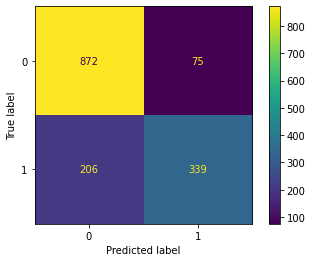

In [344]:
confusion_maxtrix = sklearn.metrics.confusion_matrix(y_test, y_test_prediction, labels=model.classes_)
confusion_maxtrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_maxtrix, display_labels=model.classes_)
confusion_maxtrix_display.plot()
pyplot.show()

## Выводы

* Подбор оптимальных значений гиперпараметров позволил получить ощутимый рост (около 5 процентных пунктов) метрики accuracy на тестовой выборке.
* Итоговая точность на тестовой выборке приблизилась к точности на обучающий, значит удалось приблизится к потолку оптимизации, для данной архитектуры сети и датасета.